In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [3]:
def euler(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    # initialize variables ###########################################
    x = np.zeros(np.shape(t))
    h = t[1]-t[0]
    x[0] = x0
    
    # iterate through calculations ###################################
    for i in range(len(t)):
        if i > 0:
            x[i] = x[i-1] + h*(f(x[i-1], t[i-1]))
        
    return x

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]


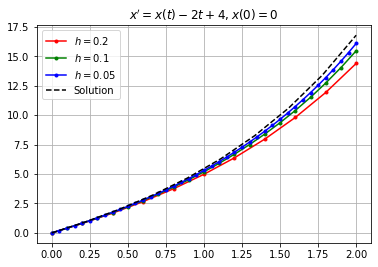

In [4]:
# initialize variables ###########################################
h_1 = .2
h_2 = .1
h_3 = .05
t_vals1 = np.arange(0, 2.2, h_1)
t_vals2 = np.arange(0, 2.1, h_2)
t_vals3 = np.arange(0, 2.05, h_3)
f = lambda x, t: x-2*t+4
x0 = 0

#calculate approximations
sol_1 = euler(f,x0,t_vals1)
sol_2 = euler(f,x0,t_vals2)
sol_3 = euler(f,x0,t_vals3)

#get true sols
t_vals4 = np.linspace(0,2,10)
true_f = lambda t: -2+2*t+2*np.exp(t)
true_sol = true_f(t_vals4)

print(t_vals1)
#plot results
plt.plot(t_vals1,sol_1,'r.-', label='$h=0.2$')
plt.plot(t_vals2,sol_2,'g.-', label='$h=0.1$')
plt.plot(t_vals3,sol_3,'b.-', label='$h=0.05$')
plt.plot(t_vals4,true_sol,'k--', label='Solution')
plt.legend()
plt.grid(True)
plt.title("$x'=x(t)-2t+4, x(0)=0$")
plt.show()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [5]:
def midpoint(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    # initialize variables ###########################################
    h = t[1]-t[0]
    x = np.zeros(t.size)
    x[0]=x0
    
    # iterate through calculations ###################################
    for i in range(len(t)):
        if i > 0:
            x[i]= x[i-1] + h*f(x[i-1]+h/2*f(x[i-1],t[i-1]),t[i-1]+h/2)
    
    return x

def rk4(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    # initialize variables ###########################################
    h = t[1]-t[0]
    x = np.zeros(t.size)
    x[0]=x0
    
    # iterate through calculations ###################################
    for i in range(len(t)):
        if i > 0:
            k_0 = f(x[i-1],t[i-1])
            k_1 = f(x[i-1]+h*k_0/2,t[i-1]+h/2)
            k_2 = f(x[i-1]+h*k_1/2,t[i-1]+h/2) 
            k_3 = f(x[i-1]+h*k_2,t[i])
            x[i]= x[i-1] + h*(k_0+2*(k_1+k_2)+k_3)/6 

    return x

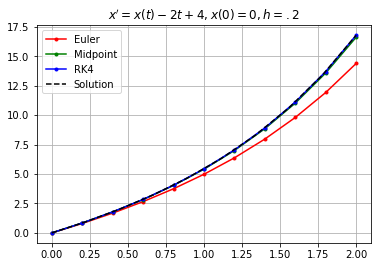

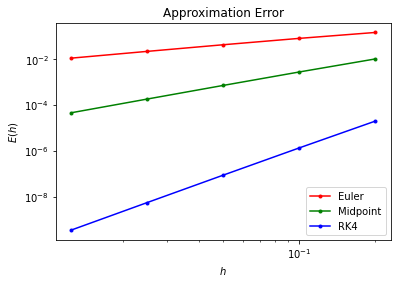

In [6]:
# initialize variables ###########################################
h_1 = .2
h_2 = .1
h_3 = .05
t_vals1 = np.arange(0,2+h_1,h_1)
t_vals2 = np.arange(0,2+h_2,h_2)
t_vals3 = np.arange(0,2+h_3,h_3)
f = lambda x,t: x-2*t+4
x0 = 0

# create approximations ##########################################
sol_1 = euler(f,x0,t_vals1)
sol_2 = midpoint(f,x0,t_vals1)
sol_3 = rk4(f,x0,t_vals1)

# get solutions ##################################################
true_f = lambda t: -2+2*t+2*np.exp(t)
t_vals4 = np.linspace(0,2,10)
true_sol = true_f(t_vals4)

# plot solutions #################################################
plt.plot(t_vals1,sol_1,'r.-', label='Euler')
plt.plot(t_vals1,sol_2,'g.-', label='Midpoint')
plt.plot(t_vals1,sol_3,'b.-', label='RK4')
plt.plot(t_vals4,true_sol,'k--', label='Solution')
plt.legend()
plt.grid(True)
plt.title("$x'=x(t)-2t+4, x(0)=0, h=.2$")
plt.show()

step_list = [.0125,.025,.05,.1,.2]
rk = []
eul = []
mid = []

# calculate error ################################################
for h in step_list:
    t_vals = np.arange(0,2+h,h)
    
    # get solutions ##############################################
    rk_4 = rk4(f,x0,t_vals)
    eu = euler(f,x0,t_vals)
    midp = midpoint(f,x0,t_vals)
    
    # calculate error ############################################
    rk.append(np.abs((true_f(2)-rk_4[-1]))/(true_f(2)))
    eul.append(np.abs((true_f(2)-eu[-1]))/true_f(2))
    mid.append(np.abs((true_f(2)-midp[-1]))/true_f(2))
    
# plot error #####################################################
plt.loglog(step_list,eul,'r.-',label="Euler")
plt.loglog(step_list,mid,'g.-',label="Midpoint")
plt.loglog(step_list,rk,'b.-',label="RK4")
plt.ylabel("$E(h)$")
plt.xlabel("$h$")
plt.legend()
plt.title("Approximation Error")
plt.show()

## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

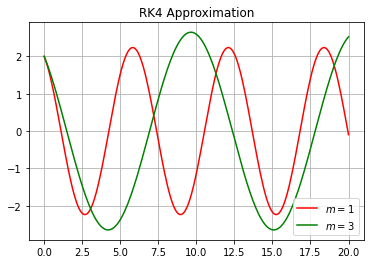

In [7]:
def rk4_oscilator(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    # initialize variables ###########################################
    h = t[1]-t[0]
    x = []
    for i in range(len(t)):
        x.append([0.,0.])
    x[0] = x0
    
    # iterate through calculations ###################################
    for i in range(len(t)):
        if i > 0:
            k_0 = f(x[i-1][0],x[i-1][1])
            k_1 = f(x[i-1][0]+h*k_0[0]/2,x[i-1][1]+h*k_0[1]/2)
            k_2 = f(x[i-1][0]+h*k_1[0]/2,x[i-1][1]+h*k_1[1]/2) 
            k_3 = f(x[i-1][0]+h*k_2[0],x[i-1][1]+h*k_2[1])
            x[i][0]= x[i-1][0] + h*(k_0[0]+2*(k_1[0]+k_2[0])+k_3[0])/6 
            x[i][1]= x[i-1][1] + h*(k_0[1]+2*(k_1[1]+k_2[1])+k_3[1])/6 
           
    return x

# m=1,k=1 function ###################################################
f = lambda x_1,x_2: [x_2,-x_1]

# m=3,k=1 function ###################################################
f_2 = lambda x_1,x_2: [x_2,-1/3*x_1]

x0 =[2,-1]
t_vals = np.arange(0,20+.1,.1)
sol_1 = rk4_oscilator(f,x0,t_vals)
sol_2 = rk4_oscilator(f_2,x0,t_vals)

# extract first element from list ####################################
def Extract(lst):
    return list(next(zip(*lst)))

sols_1 = Extract(sol_1)
sols_2 = Extract(sol_2)

# plot approximation #################################################
plt.plot(t_vals,sols_1,'r',label="$m=1$")
plt.plot(t_vals,sols_2,'g',label="$m=3$")
plt.legend()
plt.grid(True)
plt.title("RK4 Approximation")
plt.show()

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

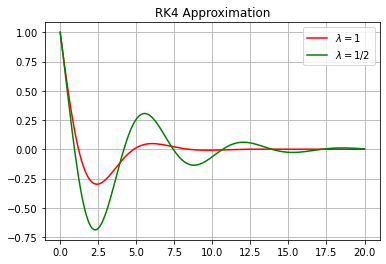

In [8]:
def rk4_dampened_oscilator(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    # initialize variables ###########################################
    h = t[1]-t[0]
    x=[]
    for i in range(len(t)):
        x.append([0.,0.])
    x[0] = x0
    
    # iterate through calculations ###################################
    for i in range(len(t)):
        if i > 0:
            k_0 = f(x[i-1][0],x[i-1][1])
            k_1 = f(x[i-1][0]+h*k_0[0]/2,x[i-1][1]+h*k_0[1]/2)
            k_2 = f(x[i-1][0]+h*k_1[0]/2,x[i-1][1]+h*k_1[1]/2) 
            k_3 = f(x[i-1][0]+h*k_2[0],x[i-1][1]+h*k_2[1])
            x[i][0]= x[i-1][0] + h*(k_0[0]+2*(k_1[0]+k_2[0])+k_3[0])/6 
            x[i][1]= x[i-1][1] + h*(k_0[1]+2*(k_1[1]+k_2[1])+k_3[1])/6 
           
    return x

# lambda=1, k=1, m=1 function ########################################
f = lambda x_1,x_2: [x_2,-x_1-x_2]

# lambda=1/2, k=1, m=1 function ######################################
f_2 = lambda x_1,x_2: [x_2,-x_1-x_2/2]

x0 =[1,-1]
t_vals = np.arange(0,20+.1,.1)
sol_1 = rk4_dampened_oscilator(f,x0,t_vals)
sol_2 = rk4_dampened_oscilator(f_2,x0,t_vals)

# extract first element from list ####################################
def Extract(lst):
    return list(next(zip(*lst)))

sols_1 = Extract(sol_1)
sols_2 = Extract(sol_2)

# plot approximation #################################################
plt.plot(t_vals,sols_1,'r',label="$\lambda=1$")
plt.plot(t_vals,sols_2,'g',label="$\lambda=1/2$")
plt.legend()
plt.grid(True)
plt.title("RK4 Approximation")
plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

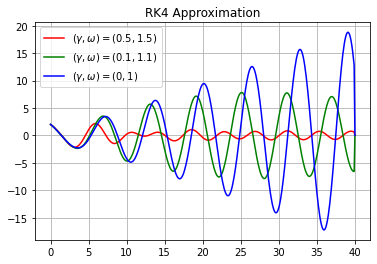

In [9]:
def rk4_dampened_forced_oscilator(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    # initialize variables ###########################################
    h = t[1]-t[0]
    x=[]
    for i in range(len(t)):
        x.append([0.,0.])
    x[0] = x0
    
    # iterate through calculations ###################################
    for i in range(len(t)-1):
        if i > 0:
            k_0 = f(x[i-1][0],x[i-1][1],t[i])
            k_1 = f(x[i-1][0]+h*k_0[0]/2,x[i-1][1]+h*k_0[1]/2,t[i]+h/2)
            k_2 = f(x[i-1][0]+h*k_1[0]/2,x[i-1][1]+h*k_1[1]/2,t[i]+h/2) 
            k_3 = f(x[i-1][0]+h*k_2[0],x[i-1][1]+h*k_2[1],t[i+1])
            x[i][0]= x[i-1][0] + h*(k_0[0]+2*(k_1[0]+k_2[0])+k_3[0])/6 
            x[i][1]= x[i-1][1] + h*(k_0[1]+2*(k_1[1]+k_2[1])+k_3[1])/6 
           
    return x

# m=2, k=2, (γ,ω) = (0.5, 1.5) function ##############################
f = lambda x_1,x_2,t: [x_2,np.cos(1.5*t)-x_1-x_2/4]

# m=2, k=2, (γ,ω) = (0.1, 1.1) function ##############################
f_2 = lambda x_1,x_2,t: [x_2,np.cos(1.1*t)-x_1-x_2/20]

# m=2, k=2, (γ,ω) = (0, 1) function ##################################
f_3 = lambda x_1,x_2,t: [x_2,np.cos(t)-x_1]

x0 =[2,-1]
t_vals = np.arange(0,40+.1,.1)
sol_1 = rk4_dampened_forced_oscilator(f,x0,t_vals)
sol_2 = rk4_dampened_forced_oscilator(f_2,x0,t_vals)
sol_3 = rk4_dampened_forced_oscilator(f_3,x0,t_vals)

# extract first element from list ####################################
def Extract(lst):
    return list(next(zip(*lst)))

sols_1 = Extract(sol_1)
sols_2 = Extract(sol_2)
sols_3 = Extract(sol_3)

# plot approximation #################################################
plt.plot(t_vals,sols_1,'r',label="$(\gamma,\omega)=(0.5, 1.5)$")
plt.plot(t_vals,sols_2,'g',label="$(\gamma,\omega)=(0.1, 1.1)$")
plt.plot(t_vals,sols_3,'b',label="$(\gamma,\omega)=(0, 1)$")
plt.legend()
plt.grid(True)
plt.title("RK4 Approximation")
plt.show()